# Lista 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Zadanie 3
Rozpatrzmy szereg czasowy $\{X_t\}_{t \in Z}$ będący ciagiem iid $\mathcal{N}(0,2)$. Korzystając z wykładu, porównaj teoretyczną funkcję autokowariancji z jej empirycznym odpowiednikiem, czyli empiryczną funkcją autokowariancji, którą dla wektora $x_1, ..., x_n$ bądącego realizacją szeregu
stacjonarnego w słabym sensie, wyznaczamy ze wzoru:

$$ \hat{\gamma}(h) = \frac{1}{n} \sum_{i=1}^{n-h} (x_i - \overline{x})(x_{i+h} - \overline{x}) $$

gdzie $\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$. Wyniki wykonaj dla różnych długości prób $n$. Zaproponuj własną metodę
oceny jakości estymatora na podstawie danych symulowanych.

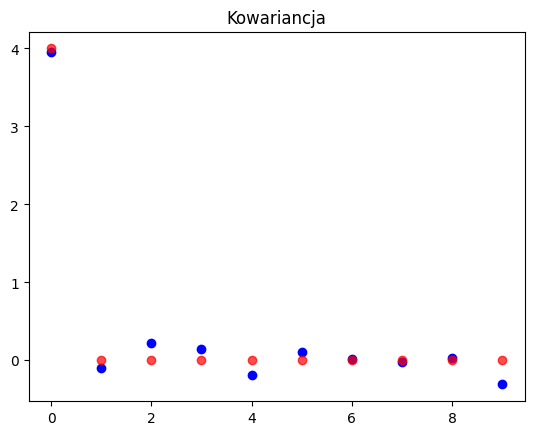

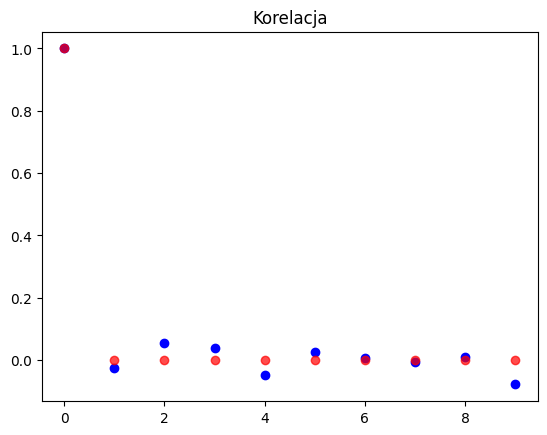

In [2]:
n = 1000
h = np.arange(0,10,1)
x = np.random.normal(0,2,size=n)

def autocov(x,h,n):
    suma = 0
    for i in range(n-h):
        suma += (x[i] - np.mean(x)) * (x[i+h] - np.mean(x))
    return suma/n

def autocorr(x,h,n):
    return autocov(x,h,n)/autocov(x,0,n)

def cov(h):
    if h == 0:
        return 4
    else:
        return 0
    
def corr(h):
    if h == 0:
        return 1
    else:
        return 0

for i, h_ in enumerate(h):
    plt.scatter(i,autocov(x,h_,n), c='b')
    plt.scatter(i,cov(h_), c='r', alpha=0.7)
plt.title('Kowariancja')
plt.show()

for i, h_ in enumerate(h):
    plt.scatter(i, autocorr(x,h_,n), c='b')
    plt.scatter(i, corr(h_), c='r', alpha=0.7)
plt.title('Korelacja')
plt.show()

## Zadanie 4
Dla modelu MA(1) zdefiniowanego na wykładzie porównaj teoretyczną i empiryczną funkcję
autokorelacji.

In [4]:
n = 1000
h = np.arange(0,10,1)
a = 2
sigma = 0.5
Xi = np.zeros(n)
Zi = np.random.normal(0, sigma, size=n+1)

for i in range(1,n+1):
    Xi[i-1] = Zi[i] + a*Zi[i-1]

In [5]:
def autocov(x,h,n):
    suma = 0
    for i in range(n-h):
        suma += (x[i] - np.mean(x)) * (x[i+h] - np.mean(x))
    return suma/n

def autocorr(x,h,n):
    return autocov(x,h,n)/autocov(x,0,n)

def cov2(sigma,h,a):
    if h == 0:
        return sigma**2 * (a**2 + 1)
    if h == 1 or h == -1:
        return a * sigma**2
    else:
        return 0
    
def corr2(sigma,h,a):
    if h == 0:
        return 1
    if h == 1 or h == -1:
        return a / (1 + a**2)
    else:
        return 0

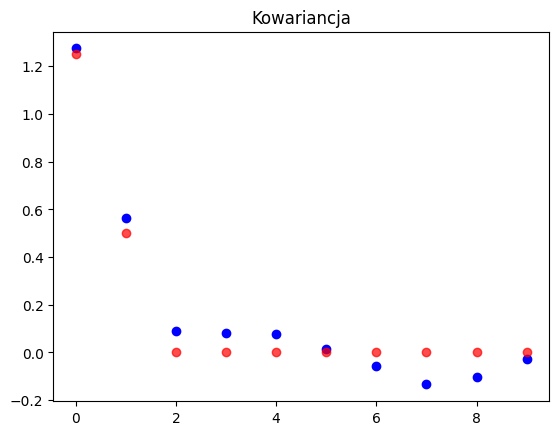

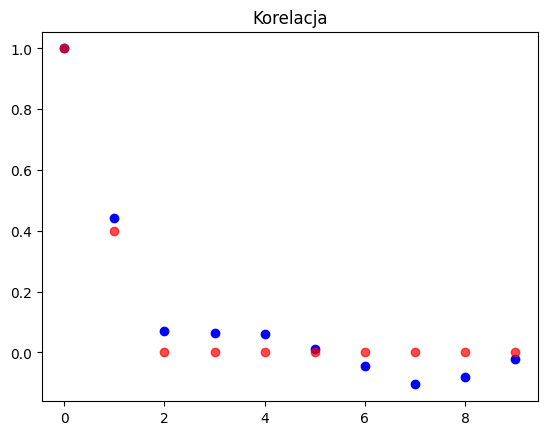

In [6]:
for i, h_ in enumerate(h):
    plt.scatter(i,autocov(Xi,h_,n), c='b')
    plt.scatter(i,cov2(sigma,h_,a), c='r', alpha=0.7)
plt.title('Kowariancja')
plt.show()

for i, h_ in enumerate(h):
    plt.scatter(i, autocorr(Xi,h_,n), c='b')
    plt.scatter(i, corr2(sigma,h_,a), c='r', alpha=0.7)
plt.title('Korelacja')
plt.show()

## Zadanie 5
Wykorzystując jeden wybrany estymator odporny z publikacji podanej poniżej (lub jeden z
estymatorów podanych na wykładzie) porównaj wyniki dla estymatora danego równaniem (1) i wybranego estymatora odpornego. W tym celu do analizy wykorzystaj model MA(1) z dodatkowym szumem dany wzorem:
$$ X_t = Z_t + \theta Z_{t-1} + \xi_t $$
gdzie $\{Z_t\}_{t \in Z}$ to ciąg iid $\mathcal{N}(0,1)$, a $\{\xi_t\}_{t \in Z}$ to ciąg iid taki, że $P(\xi_t = a) = P(\xi_t = -a) = \frac{p}{2}$ oraz $P(\xi_t = 0) = 1 - p$, który jest niezależny od $\{Z_t\}$. Sprawdź poprawność estymatorów w zależnosci od $a$ oraz $p$ dla wybranych długości prób z modelu (2). Zaproponuj metodę oceny jakości uzyskanych wyników.

In [15]:
def corr_5(x,h):
    suma = 0
    for i in range(1, n-h):
        suma += np.sign((x[i] - np.mean(x))*(x[i+h] - np.mean(x)))
    return np.sin(np.pi / ((n-h)*2) * suma)

def autocov(x,h,n):
    suma = 0
    for i in range(n-h):
        suma += (x[i] - np.mean(x)) * (x[i+h] - np.mean(x))
    return suma/n

def autocorr(x,h,n):
    return autocov(x,h,n)/autocov(x,0,n)

def corr2(h,a):
    if h == 0:
        return 1
    if h == 1 or h == -1:
        return a / (1 + a**2)
    else:
        return 0

In [8]:
n = 5000
sigma = 0.5
theta = 2
p = 0.01
a = 20
h = np.arange(0,10,1)

Z_t = np.random.normal(0, 1, size=n)
xi = np.random.choice([-a, 0, a], n, p=[p/2, 1-p, p/2])
X_t = np.zeros(n)

for i in range(1,n):
    X_t[i] = Z_t[i] + theta*Z_t[i-1] + xi[i]

Y_t = X_t + xi

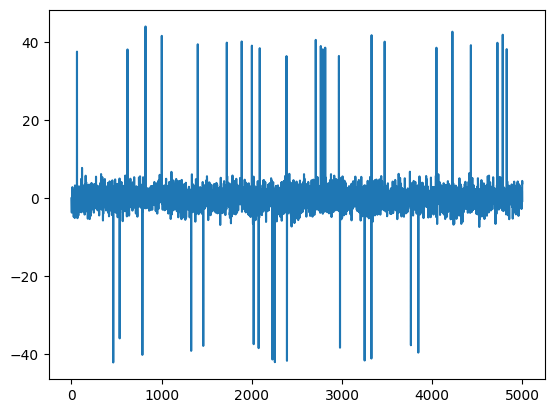

In [9]:
plt.plot(np.arange(0,n,1), Y_t)
plt.show()

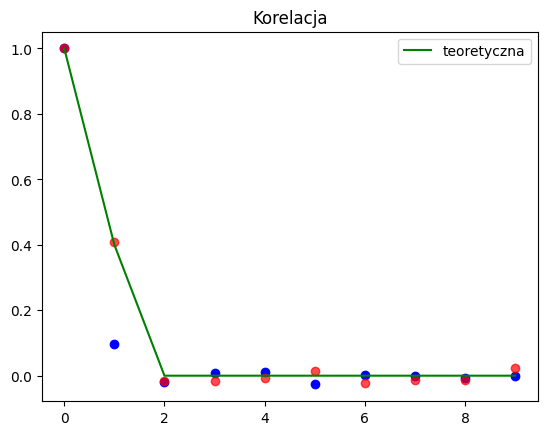

In [10]:
corr5 = []
for h_ in h:
    corr5.append(corr2(h_,theta))

for i, h_ in enumerate(h):
    plt.scatter(i, autocorr(Y_t, h_, n), c='b')     # empiryczna est (1)
    plt.scatter(i, corr_5(Y_t,h_), c='r', alpha=0.7)    # empiryczna est (2)
plt.plot(np.arange(0,10,1), corr5, c='green', label='teoretyczna')
plt.title('Korelacja')
plt.legend()
plt.show()

In [16]:
n = 1000
theta = 2
sigma = 0.5
a = np.arange(1,11,1)
M = 100
p = np.arange(0.01,0.16,0.01)
h = 1
# a = a / (1 + a**2)

def sr_blad_bezw(M, p, a, h=1, n=n):
    suma = 0
    for i in range(1,M+1):
        Z_t = np.random.normal(0, 1, size=n)
        xi = np.random.choice([-a, 0, a], n, p=[p/2, 1-p, p/2])
        X_t = np.zeros(n)
        for i in range(1,n):
            X_t[i] = Z_t[i] + theta*Z_t[i-1] + xi[i]
        Y_t = X_t + xi
        corr_est = autocorr(Y_t, h, n)
        corr_teo = corr2(h, theta)
        suma += abs(corr_est - corr_teo)
    return suma/M

In [17]:
data_corr1 = np.zeros((len(a),len(p)))

for i, a_ in enumerate(a):
    for j, p_ in enumerate(p):
        data_corr1[i][j] = sr_blad_bezw(M,p_,a_)

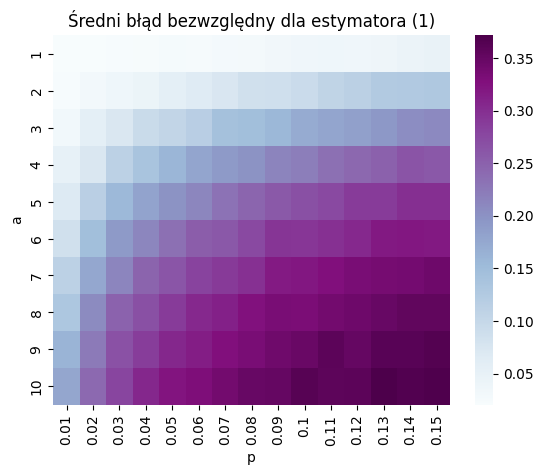

In [18]:
p_axis = np.round(p,2)
sns.heatmap(data_corr1, cmap="BuPu", xticklabels=p_axis, yticklabels=a)
plt.xlabel('p')
plt.ylabel('a')
plt.title('Średni błąd bezwzględny dla estymatora (1)')
plt.show()

In [50]:
n = 1000
theta = 2
sigma = 0.5
a = np.arange(1,11,1)
M = 100
p = np.arange(0.01,0.16,0.01)
h = 1
# a = a / (1 + a**2)

def sr_blad_bezw2(M, p, a, h=1, n=n):
    suma = 0
    for i in range(1,M+1):
        Z_t = np.random.normal(0, 1, size=n)
        xi = np.random.choice([-a, 0, a], n, p=[p/2, 1-p, p/2])
        X_t = np.zeros(n)
        for i in range(1,n):
            X_t[i] = Z_t[i] + theta*Z_t[i-1] + xi[i]
        Y_t = X_t + xi
        corr_est = corr_5(Y_t,h)
        corr_teo = corr2(h, theta)
        suma += abs(corr_est - corr_teo)
    return suma/M

In [51]:
data_corr2 = np.zeros((len(a),len(p)))

for i, a_ in enumerate(a):
    for j, p_ in enumerate(p):
        data_corr2[i][j] = sr_blad_bezw2(M,p_,a_)

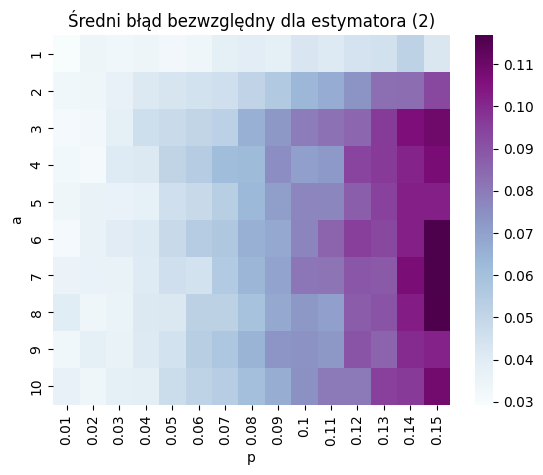

In [54]:
p_axis = np.round(p,2)
sns.heatmap(data_corr2, cmap="BuPu", xticklabels=p_axis, yticklabels=a)
plt.xlabel('p')
plt.ylabel('a')
plt.title('Średni błąd bezwzględny dla estymatora (2)')
plt.show()